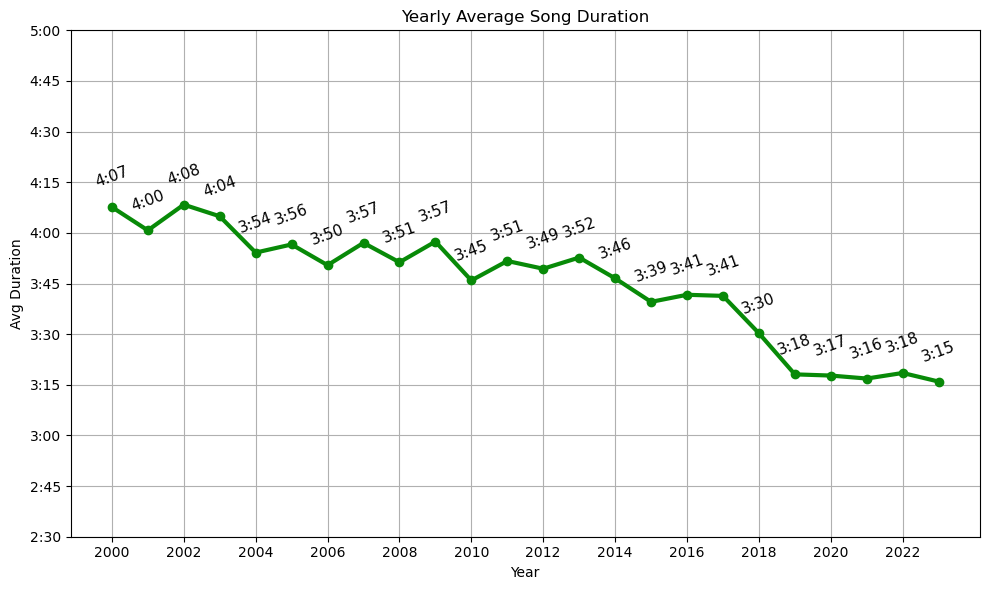

In [3]:
#####################완성
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('playlist_2010to2023.xlsx', index_col='year', usecols='A:G')

# 연도별 평균 재생 시간 구하기
avg_duration = df.groupby(df.index)['duration_ms'].mean()

def ms_to_time(ms):
    m = ms // 60000  
    s = (ms % 60000) // 1000  
    return str(m).zfill(2) + ":" + str(s).zfill(2)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(avg_duration.index, avg_duration, marker='o', color='#088A08', linewidth=3)

# 그래프 제목과 축 라벨 설정
plt.title('Yearly Average Song Duration')
plt.xlabel('Year')
plt.ylabel('Avg Duration')

# y축 범위 설정
plt.ylim(150000, 300000)
plt.yticks(range(150000, 300001, 15000), [ms_to_time(y) for y in range(150000, 300001, 15000)])

# x축 연도를 2년 단위로 표시
plt.xticks(avg_duration.index[::2])  # 2년 간격으로 표시

# 격자
plt.grid(True)

# 데이터 값 표시
for i in range(len(avg_duration)):
    duration = ms_to_time(int(avg_duration.iloc[i]))
    plt.text(avg_duration.index[i], avg_duration.iloc[i] + 5000, 
             duration, ha='center', va='bottom', fontsize=11, rotation=20)

# 그래프 레이아웃 조정, 출력
plt.tight_layout()
plt.show()